<a href="https://colab.research.google.com/github/ricardossiqueira/trabalho-final-sistemas-lineares/blob/main/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho final de Sistemas Lineares I\
EEL350 - Sistemas Lineares I\
Professor: Natanael Nunes de Moura Júnior\
Aluno: Ricardo Santos Siqueira \
DRE: 118167558

# Instalações e importações

Execute esse bloco para instalar e importar as bibliotecas necessárias

In [ ]:
# Instalação da lib control

!pip install control

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from scipy import signal as signal

# Setup

Reuni todas as funções criadas nesse bloco de setup. Execute o bloco para definir todas as funções necessárias.

## Inicializar alphas e betas

In [ ]:
# Inicializando os valores de alpha e beta
alphas = betas = [0.1, 1, 10, 100]

## Inicializando váriavel s

In [ ]:
# Inicializando a váriavel s para função de transferência na lib control
s = ctrl.TransferFunction.s

## Função Resposta ao Degrau Unitário

In [ ]:
# sys = função de transferência
# alpha = valor de alpha
# beta = valor de beta
def plot_unitary_step_response(sys, alpha=0, beta=0):
  t, y = signal.step(sys)
  plt.figure(1)
  plt.plot(t, y)
  if alpha:
    plt.title(f'Resposta ao Degrau Unitário - alpha {alpha}')
  elif beta :
    plt.title(f'Resposta ao Degrau Unitário - beta {beta}')
  else:
    plt.title(f'Resposta ao Degrau Unitário')
  plt.xlabel('t')
  plt.grid()
  plt.show()

## Função Resposta à Rampa Unitária

In [ ]:
# sys = função de transferência
# alpha = valor de alpha
# beta = valor de beta
def plot_unitary_ramp_response(sys, t_range=10, ratio=500, alpha=0, beta=0):
  t = np.linspace(0, t_range, ratio)

  # t = tout
  tout, yout, xout = signal.lsim(sys, t, t)

  # plotando grafico
  plt.plot(t, t, 'r', alpha=0.5, linewidth=1, label='Ramp (in)')
  plt.plot(t, yout, 'k', linewidth=1.5, label='Res (out)')
  plt.legend(loc='best', shadow=True, framealpha=1)
  if alpha:
    plt.title(f'Resposta à Rampa Unitária - alpha {alpha}')
  elif beta:
    plt.title(f'Resposta à Rampa Unitária - beta {beta}')
  else:
    plt.title(f'Resposta à Rampa Unitária')
  plt.xlabel('t')
  plt.grid()
  plt.show()

## Função Resposta à Onda Quadrada

In [ ]:
# sys =  funcao de transferencia
# freq = frequencia do pwm
# t_freq = titulo da frequencia
# alpha = valor de alpha
# beta = valor de beta
def plot_square_wave_response(sys, freq, t_freq, t_range=10, ratio=500, alpha=0, beta=0):
  t = np.linspace(0, t_range, ratio, endpoint=False)

  # onda quadrada de frequencia freq
  pwm = signal.square(2 * np.pi * freq * t)

  # simulacao de resposta
  tout, yout, xout = signal.lsim(sys, pwm, t)

  # t = tout

  # plotando grafico
  plt.plot(t, pwm, 'r', alpha=0.5, linewidth=1, label='PWM (in)')
  plt.plot(t, yout, 'k', linewidth=1.5, label='Res (out)')
  plt.legend(loc='best', shadow=True, framealpha=1)
  if alpha:
    plt.title(f'Resposta a Onda Quadrada de frequência {t_freq} - alpha {alpha}')
  elif beta:
    plt.title(f'Resposta a Onda Quadrada de frequÊncia {t_freq} - beta {beta}')
  else:
    plt.title(f'Resposta a Onda Quadrada de frequência {t_freq}')
  plt.xlabel('t')
  plt.grid()
  plt.show()

## Função Diagrama de Pólos e Zeros #3

Funções referentes apenas à Questão 3

In [ ]:
# Gerar diagrama de Pólos e Zeros
def plot_pz_3_1(alpha): 
  sys = (1 + alpha*s)/(s**2 + 2*s + 2)
  ctrl.pzmap(sys, plot=True, title=f'Diagrama de Pólos e Zeros - aplha {alpha}')

def plot_pz_3_2(beta): 
  sys = (s + 10**4)/(s**2 + 20*beta*s + 100)
  ctrl.pzmap(sys, plot=True, title=f'Diagrama de Pólos e Zeros - beta {beta}')

## Função Diagrama de Bode #3

Funções referentes apenas à Questão 3

In [ ]:
# Gerar Diagrama de Bode
def plot_bode_3_1(alpha):
  sys = (1 + alpha*s)/(s**2 + 2*s + 2)
  print(f'Diagrama de Bode - alpha {alpha}')
  ctrl.bode_plot(sys, plot=True)

def plot_bode_3_2(beta):
  sys = (s + 10**4)/(s**2 + 20*beta*s + 100)
  print(f'Diagrama de Bode - beta {beta}')
  ctrl.bode_plot(sys, plot=True)

## Função Gerar Harmônicos da Série de Fourier

A série de Fourier para uma Onda Quadrada de frequência 1Hz (se omega = 1 e phi = 0) é
\
\
<img src="https://latex.codecogs.com/gif.latex?%5Csum%5E%5Cinfty_%7Bn%20%3D%201%7D%20%5Cdfrac4%5Cpi%20sen%5Cbigg%28%5Comega%20%5Cdfrac%7B%282n-1%29%5Cpi%20t%7D%7B2n-1%7D%20&plus;%20%5Cpsi%20%5Cbigg%29%2C%20%5Cbegin%7Bcases%7D%20%5Comega%20%3D%20%5Ctext%7Bmodificador%20de%20frequencia%7D%20%5C%5C%20%5Cpsi%20%3D%20%5Ctext%7Bfase%7D%20%5Cend%7Bcases%7D"/>


In [ ]:
# freq = frequência
# harmonic = harmônico
# t = espaço linear de tempo
# Gerar Harmônicos da Serie de Fourier de uma Onda Quadrada
def fourier_harmonic_generator(freq, harmonic, t):
  series = 0
  for i in range(harmonic):
    n = i + 1
    current_harmonic = (4/np.pi)*(np.sin(freq*(2*n-1)*t*np.pi)/(2*n-1))
    series += current_harmonic
  return series

## Função Resposta aos n Primeiros Harmônicos da Série de Fourier

In [ ]:
# sys = função de transferência
# alpha = valor de alpha
# beta = valor de beta
# freq = frequência da série
# harmonic = harmônico
# freq_title = titulo da frequência no gráfico
def plot_harmonic_response(sys, freq, harmonic, freq_title, t_range=10, ratio=500, alpha=0, beta=0):
  t = np.linspace(0, t_range, ratio)

  series = fourier_harmonic_generator(freq, harmonic, t)

  tout, yout, xout = signal.lsim(sys, series, t)
 
  # t = tout

  # plotando grafico
  plt.plot(t, series, 'r', alpha=0.5, linewidth=1, label='Harmonic (in)')
  plt.plot(t, yout, 'k', linewidth=1.5, label='Res (out)')
  plt.legend(loc='best', shadow=True, framealpha=1)
  if alpha:
    plt.title(f'Resposta aos #{harmonic} Primeiros Harmônicos da Série de Fourier com frequência {freq_title} - alpha {alpha}')
  elif beta:
    plt.title(f'Resposta aos #{harmonic} Primeiros Harmônicos da Série de Fourier com frequência {freq_title} - beta {beta}')
  else:
    plt.title(f'Resposta aos #{harmonic} Primeiros Harmônicos da Série de Fourier com frequência {freq_title}')
  plt.xlabel('t')
  plt.grid()
  plt.show()

## Função Resposta à Cossenóides de Frequência f

In [ ]:
# sys =  funcao de transferencia
# freq = frequencia do pwm
# t_freq = titulo da frequencia
# alpha = valor de alpha
# beta = valor de beta
# t_range = alcance da análise em segundo
# ratio = resolução do plot
def plot_cosine_response(sys, freq, t_range=10, ratio=100,alpha=0, beta=0):
  t = np.linspace(0, t_range, ratio, endpoint=False)

  # cossenoide de frequencia freq
  cos = np.cos(freq * t)

  # simulacao de resposta
  tout, yout, xout = signal.lsim(sys, cos, t)

  # t = tout

  # plotando grafico
  plt.plot(t, cos, 'r', alpha=0.5, linewidth=1, label='Cos (in)')
  plt.plot(t, yout, 'k', linewidth=1.5, label='Res (out)')
  plt.legend(loc='best', shadow=True, framealpha=1)
  if alpha:
    plt.title(f'Resposta à Cossenóide de frequência {freq} Hz - alpha {alpha}')
  elif beta:
    plt.title(f'Resposta à Cossenóide de frequência {freq} Hz - beta {beta}')
  else:
    plt.title(f'Resposta à Cossenóide de frequência {freq} Hz')
  plt.xlabel('t')
  plt.grid()
  plt.show()

# Questão 1)

## Circuito 1

### e) Diagrama de polos e zeros

(array([-100.]), array([], dtype=float64))

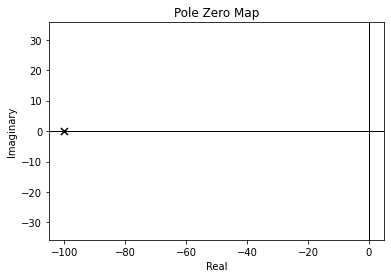

In [ ]:
R_1 = 10000
C = 10**-6
sys = (1/(R_1*C*s + 1))

ctrl.pzmap(sys)

### f) Diagrama de Bode

(array([0.99503719, 0.99499157, 0.99494553, 0.99489907, 0.99485219,
        0.99480488, 0.99475714, 0.99470897, 0.99466035, 0.99461129,
        0.99456179, 0.99451183, 0.99446142, 0.99441055, 0.99435922,
        0.99430742, 0.99425515, 0.9942024 , 0.99414917, 0.99409546,
        0.99404126, 0.99398656, 0.99393137, 0.99387568, 0.99381948,
        0.99376277, 0.99370554, 0.99364779, 0.99358952, 0.99353072,
        0.99347139, 0.99341152, 0.9933511 , 0.99329013, 0.99322862,
        0.99316654, 0.9931039 , 0.99304069, 0.99297691, 0.99291255,
        0.99284761, 0.99278208, 0.99271595, 0.99264923, 0.9925819 ,
        0.99251396, 0.99244541, 0.99237623, 0.99230643, 0.992236  ,
        0.99216493, 0.99209322, 0.99202086, 0.99194785, 0.99187417,
        0.99179983, 0.99172482, 0.99164913, 0.99157276, 0.9914957 ,
        0.99141794, 0.99133948, 0.99126032, 0.99118044, 0.99109984,
        0.99101851, 0.99093645, 0.99085365, 0.9907701 , 0.9906858 ,
        0.99060075, 0.99051492, 0.99042833, 0.99

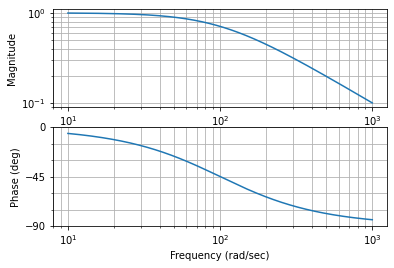

In [ ]:
R_1 = 10000
C = 10**-6
sys = (1/(R_1*C*s + 1))

ctrl.bode_plot(sys)

### g) Resposta ao Degrau Unitário

In [ ]:
# Vamos verificar a função de transferência já simplificada
R_1 = 10000
C = 10**-6
sys = (1/(R_1*C*s + 1))
sys

TransferFunction(array([1]), array([0.01, 1.  ]))

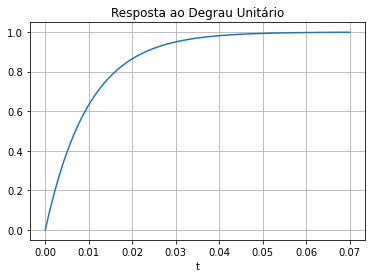

In [ ]:
sys = signal.TransferFunction([1], [0.01, 1])
plot_unitary_step_response(sys)

### h) Resposta à Rampa Unitária

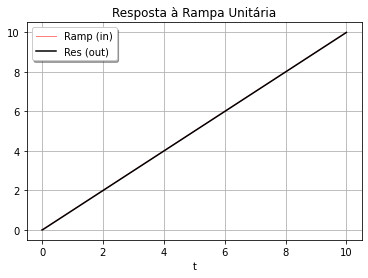

In [ ]:
sys = signal.TransferFunction([1], [0.01, 1])
plot_unitary_ramp_response(sys)

### i) Resposta à onda quadrada de frequencia pi/8

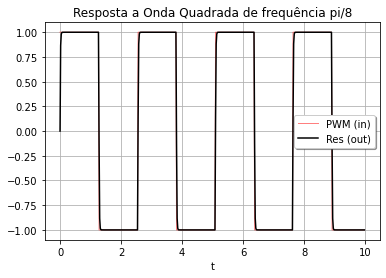

In [ ]:
sys = signal.TransferFunction([1], [0.01, 1])
plot_square_wave_response(sys, np.pi/8, 'pi/8')

### j) Resposta aos 1º Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8


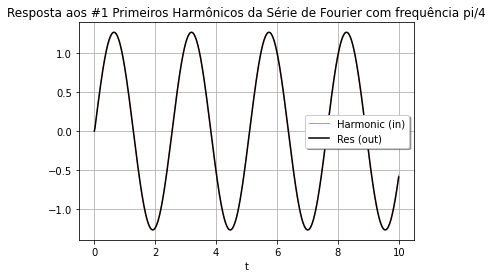

In [ ]:
sys = signal.TransferFunction([1], [0.01, 1])
plot_harmonic_response(sys, freq=np.pi/4, harmonic=1, freq_title="pi/4")

### k) Resposta aos 3 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8


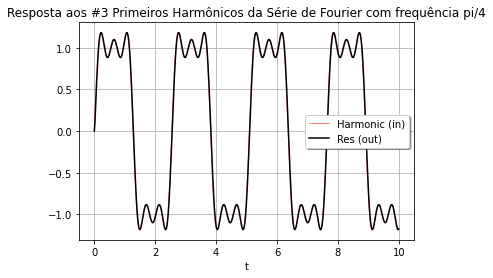

In [ ]:
sys = signal.TransferFunction([1], [0.01, 1])
plot_harmonic_response(sys, freq=np.pi/4, harmonic=3, freq_title="pi/4")

### l) Resposta aos 5 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8

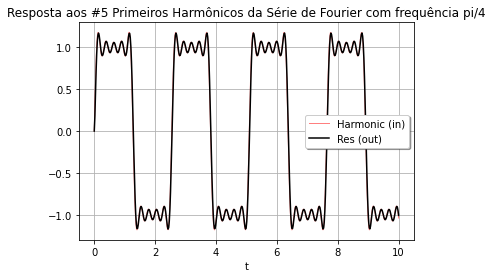

In [ ]:
sys = signal.TransferFunction([1], [0.01, 1])
plot_harmonic_response(sys, freq=np.pi/4, harmonic=5, freq_title="pi/4")

### m) Resposta aos 7 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8



In [ ]:
sys = signal.TransferFunction([1], [0.01, 1])
plot_harmonic_response(sys, freq=np.pi/4, harmonic=7, freq_title="pi/4")

## Circuito 2

### e) Diagrama de polos e zeros

(array([-1.e+16]), array([0.]))

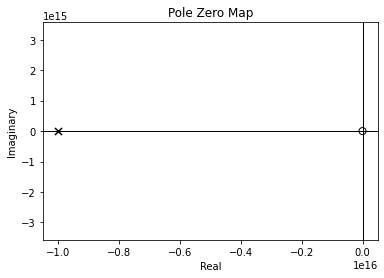

In [ ]:
R_1 = 10000
L = 100**-6
sys = L*s/(R_1+L*s)

ctrl.pzmap(sys)

### f) Diagrama de Bode

In [ ]:
R_1 = 10000
L = 100**-6
sys = L*s/(R_1+L*s)

ctrl.bode(sys)

(array([0.09950372, 0.09995888, 0.10041609, 0.10087534, 0.10133666,
        0.10180003, 0.10226548, 0.10273302, 0.10320264, 0.10367437,
        0.10414821, 0.10462416, 0.10510224, 0.10558245, 0.10606481,
        0.10654933, 0.107036  , 0.10752485, 0.10801588, 0.10850909,
        0.10900451, 0.10950213, 0.11000196, 0.11050403, 0.11100833,
        0.11151487, 0.11202366, 0.11253472, 0.11304805, 0.11356365,
        0.11408155, 0.11460175, 0.11512426, 0.11564908, 0.11617623,
        0.11670572, 0.11723756, 0.11777175, 0.1183083 , 0.11884723,
        0.11938855, 0.11993226, 0.12047837, 0.1210269 , 0.12157784,
        0.12213123, 0.12268705, 0.12324532, 0.12380606, 0.12436927,
        0.12493496, 0.12550314, 0.12607382, 0.12664701, 0.12722272,
        0.12780097, 0.12838175, 0.12896509, 0.12955098, 0.13013945,
        0.13073049, 0.13132413, 0.13192037, 0.13251921, 0.13312068,
        0.13372478, 0.13433152, 0.13494091, 0.13555297, 0.13616769,
        0.1367851 , 0.1374052 , 0.138028  , 0.13

### g) Resposta ao Degrau Unitário

In [ ]:
# Vamos verificar a função de transferência já simplificada
R_1 = 10000
L = 100**-6
sys = L*s/(R_1+L*s)

sys

TransferFunction(array([1.e-12, 0.e+00]), array([1.e-12, 1.e+04]))

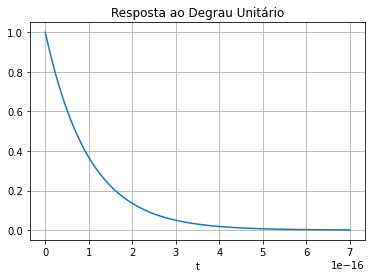

In [ ]:
sys = signal.TransferFunction([10**-12, 0],[10**-12, 10**4])
plot_unitary_step_response(sys)

### h) Resposta à Rampa Unitária

In [ ]:
sys = signal.TransferFunction([10**-12, 0],[10**-12, 10**4])
plot_unitary_ramp_response(sys, t_range=1000)

### i) Resposta à onda quadrada de frequencia pi/8

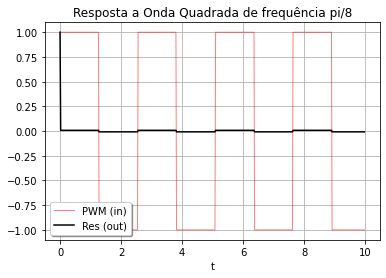

In [ ]:
sys = signal.TransferFunction([10**-12, 0],[10**-12, 10**4])
plot_square_wave_response(sys, np.pi/8, 'pi/8')

### j) Resposta aos 1º Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8


In [ ]:
sys = signal.TransferFunction([10**-12, 0],[10**-12, 10**4])
plot_harmonic_response(sys, freq=np.pi/4, harmonic=1, freq_title="pi/4")

### k) Resposta aos 3 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8


In [ ]:
sys = signal.TransferFunction([10**-12, 0],[10**-12, 10**4])
plot_harmonic_response(sys, freq=np.pi/4, harmonic=3, freq_title="pi/4")

### l) Resposta aos 5 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8

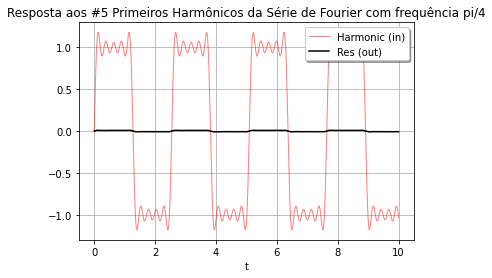

In [ ]:
sys = signal.TransferFunction([10**-12, 0],[10**-12, 10**4])
plot_harmonic_response(sys, freq=np.pi/4, harmonic=5, freq_title="pi/4")

### m) Resposta aos 7 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8



In [ ]:
sys = signal.TransferFunction([10**-12, 0],[10**-12, 10**4])
plot_harmonic_response(sys, freq=np.pi/4, harmonic=7, freq_title="pi/4")

## Circuito 3

### e) Diagrama de polos e zeros

In [ ]:
R_1 = 22000
C = 220**-6
sys = R_1/(1+s*C*R_1)

ctrl.pzmap(sys)

(array([-5.153632e+09]), array([], dtype=float64))

### f) Diagrama de Bode

In [ ]:
R_1 = 22000
C = 220**-6
sys = R_1/(1+s*C*R_1)

ctrl.bode_plot(sys)

(array([21995.85959083, 21995.80195045, 21995.74350786, 21995.68425191,
        21995.62417129, 21995.56325452, 21995.50148998, 21995.43886588,
        21995.37537025, 21995.31099099, 21995.24571579, 21995.1795322 ,
        21995.11242759, 21995.04438915, 21994.97540389, 21994.90545864,
        21994.83454006, 21994.76263461, 21994.68972857, 21994.61580802,
        21994.54085885, 21994.46486678, 21994.38781728, 21994.30969567,
        21994.23048703, 21994.15017625, 21994.06874801, 21993.98618678,
        21993.90247679, 21993.81760208, 21993.73154646, 21993.64429352,
        21993.5558266 , 21993.46612883, 21993.3751831 , 21993.28297207,
        21993.18947815, 21993.09468351, 21992.99857006, 21992.90111948,
        21992.80231318, 21992.70213233, 21992.60055781, 21992.49757027,
        21992.39315005, 21992.28727727, 21992.17993172, 21992.07109294,
        21991.96074019, 21991.84885243, 21991.73540834, 21991.62038627,
        21991.50376433, 21991.38552026, 21991.26563155, 21991.14

### g) Resposta ao Degrau Unitário

In [ ]:
# Vamos verificar a função de transferência já simplificada
R_1 = 22000
C = 220**-6
sys = R_1/(1+s*C*R_1)

sys

TransferFunction(array([22000]), array([1.94037913e-10, 1.00000000e+00]))

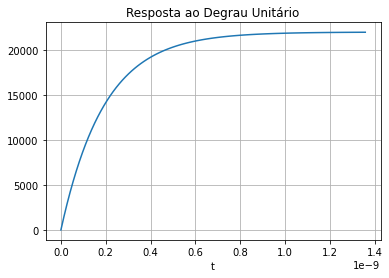

In [ ]:
sys = signal.TransferFunction([2.2*10**4],[1.94*10**-10, 1])
plot_unitary_step_response(sys)

### h) Resposta à Rampa Unitária

In [ ]:
sys = signal.TransferFunction([2.2*10**4],[1.94*10**-10, 1])
plot_unitary_ramp_response(sys, t_range=1*10**-3)

### i) Resposta à onda quadrada de frequencia pi/8

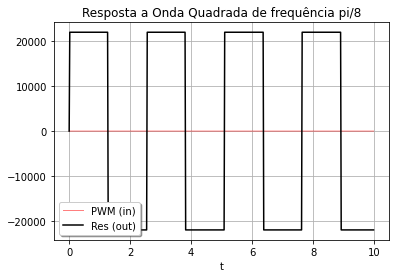

In [ ]:
sys = signal.TransferFunction([2.2*10**4],[1.94*10**-10, 1])
plot_square_wave_response(sys, np.pi/8, 'pi/8')

### j) Resposta aos 1º Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8


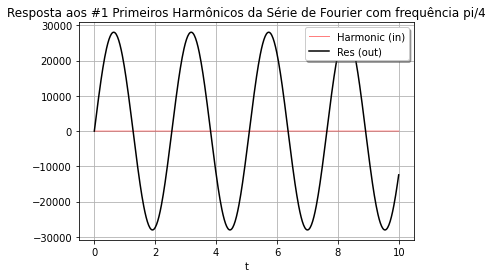

In [ ]:
sys = signal.TransferFunction([2.2*10**4],[1.94*10**-10, 1])
plot_harmonic_response(sys, freq=np.pi/4, harmonic=1, freq_title="pi/4")

### k) Resposta aos 3 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8


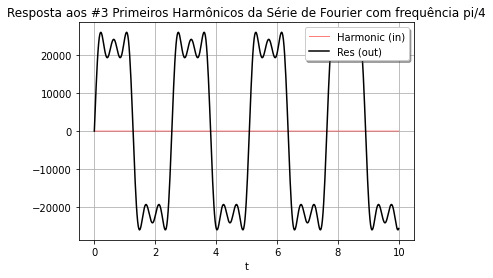

In [ ]:
sys = signal.TransferFunction([2.2*10**4],[1.94*10**-10, 1])
plot_harmonic_response(sys, freq=np.pi/4, harmonic=3, freq_title="pi/4")

### l) Resposta aos 5 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8

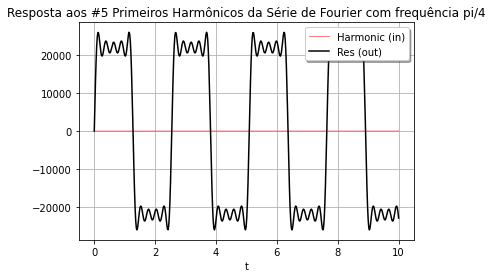

In [ ]:
sys = signal.TransferFunction([2.2*10**4],[1.94*10**-10, 1])
plot_harmonic_response(sys, freq=np.pi/4, harmonic=5, freq_title="pi/4")

### m) Resposta aos 7 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8



In [ ]:
sys = signal.TransferFunction([1000],[9.27711312e-08, 1.00000000e+00])
plot_harmonic_response(sys, freq=np.pi/4, harmonic=7, freq_title="pi/4")

## Circuito 4

### e) Diagrama de polos e zeros

(array([-2.2e+15]), array([0.]))

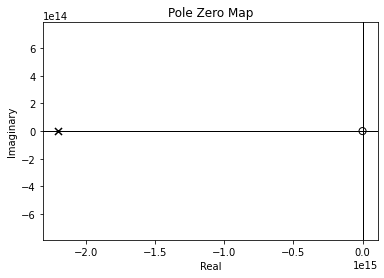

In [ ]:
R_1 = 2.2*10**3
L = 100**-6
sys = (R_1*L*s)/(L*s+R_1)

ctrl.pzmap(sys)

### f) Diagrama de Bode

(array([  99.89685402,  100.58855743,  101.28503011,  101.98630452,
         102.69241333,  103.40338944,  104.11926594,  104.84007616,
         105.56585361,  106.29663207,  107.03244549,  107.77332807,
         108.51931422,  109.27043858,  110.02673601,  110.7882416 ,
         111.55499066,  112.32701873,  113.10436157,  113.8870552 ,
         114.67513584,  115.46863995,  116.26760424,  117.07206563,
         117.8820613 ,  118.69762866,  119.51880535,  120.34562925,
         121.17813851,  122.01637148,  122.86036678,  123.71016327,
         124.56580006,  125.4273165 ,  126.2947522 ,  127.168147  ,
         128.04754101,  128.93297459,  129.82448834,  130.72212313,
         131.62592008,  132.53592056,  133.45216622,  134.37469895,
         135.30356091,  136.2387945 ,  137.18044243,  138.12854763,
         139.08315331,  140.04430297,  141.01204033,  141.98640942,
         142.96745452,  143.9552202 ,  144.94975128,  145.95109287,
         146.95929035,  147.97438937,  148.99643

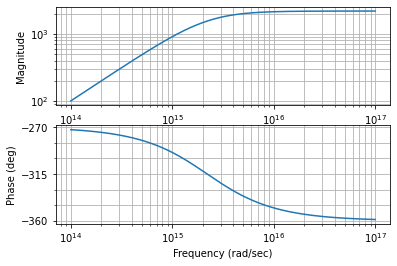

In [ ]:
R_1 = 2.2*10**3
L = 100**-6
sys = (R_1*L*s)/(L*s+R_1)

ctrl.bode_plot(sys)

### g) Resposta ao Degrau Unitário

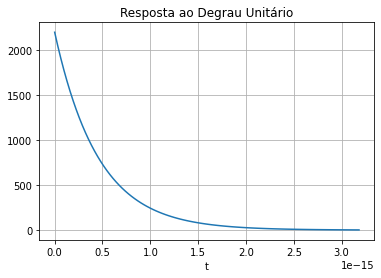

In [ ]:
R_1 = 2.2*10**3
L = 100**-6
sys = signal.TransferFunction([R_1*L, 0],[L, R_1])

plot_unitary_step_response(sys)

### h) Resposta à Rampa Unitária

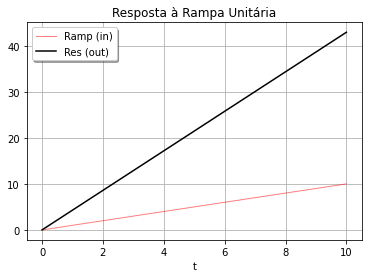

In [ ]:
R_1 = 2.2*10**3
L = 100**-6
sys = signal.TransferFunction([R_1*L, 0],[L, R_1])

plot_unitary_ramp_response(sys)

### i) Resposta à onda quadrada de frequencia pi/8

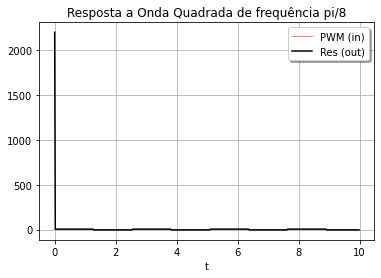

In [ ]:
R_1 = 2.2*10**3
L = 100**-6
sys = signal.TransferFunction([R_1*L, 0],[L, R_1])

plot_square_wave_response(sys, np.pi/8, 'pi/8')

### j) Resposta aos 1º Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8


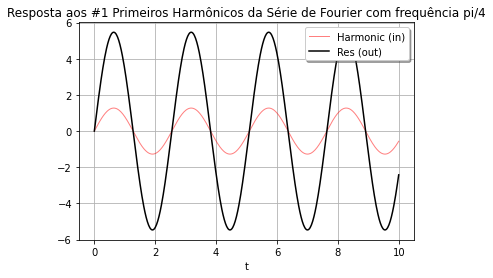

In [ ]:
R_1 = 2.2*10**3
L = 100**-6
sys = signal.TransferFunction([R_1*L, 0],[L, R_1])

plot_harmonic_response(sys, freq=np.pi/4, harmonic=1, freq_title="pi/4")

### k) Resposta aos 3 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8


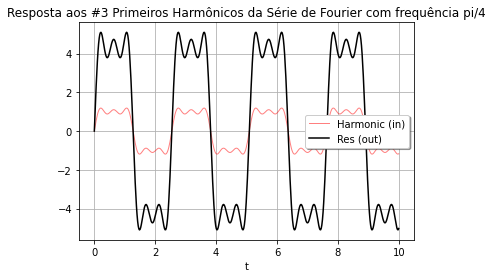

In [ ]:
R_1 = 2.2*10**3
L = 100**-6
sys = signal.TransferFunction([R_1*L, 0],[L, R_1])

plot_harmonic_response(sys, freq=np.pi/4, harmonic=3, freq_title="pi/4")

### l) Resposta aos 5 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8

In [ ]:
# sys = signal.TransferFunction([alpha, 1],[1, 2, 2])
# plot_harmonic_response(sys, freq=np.pi/4, harmonic=5, beta=beta, freq_title="pi/4")

### m) Resposta aos 7 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8



In [ ]:
# sys = signal.TransferFunction([alpha, 1],[1, 2, 2])
# plot_harmonic_response(sys, freq=np.pi/4, harmonic=7, beta=beta, freq_title="pi/4")

## Circuito 5

### e) Diagrama de polos e zeros

In [ ]:
# plot_pz_3_1(0.1)

### f) Diagrama de Bode

(array([6.04789936e-02, 6.09054059e-02, 6.13349204e-02, 6.17675616e-02,
        6.22033544e-02, 6.26423240e-02, 6.30844954e-02, 6.35298944e-02,
        6.39785467e-02, 6.44304784e-02, 6.48857158e-02, 6.53442855e-02,
        6.58062142e-02, 6.62715292e-02, 6.67402577e-02, 6.72124274e-02,
        6.76880662e-02, 6.81672024e-02, 6.86498645e-02, 6.91360811e-02,
        6.96258814e-02, 7.01192948e-02, 7.06163509e-02, 7.11170798e-02,
        7.16215116e-02, 7.21296770e-02, 7.26416070e-02, 7.31573327e-02,
        7.36768858e-02, 7.42002981e-02, 7.47276020e-02, 7.52588300e-02,
        7.57940150e-02, 7.63331904e-02, 7.68763897e-02, 7.74236471e-02,
        7.79749969e-02, 7.85304739e-02, 7.90901132e-02, 7.96539504e-02,
        8.02220213e-02, 8.07943624e-02, 8.13710103e-02, 8.19520022e-02,
        8.25373756e-02, 8.31271685e-02, 8.37214194e-02, 8.43201671e-02,
        8.49234509e-02, 8.55313105e-02, 8.61437862e-02, 8.67609187e-02,
        8.73827490e-02, 8.80093188e-02, 8.86406703e-02, 8.927684

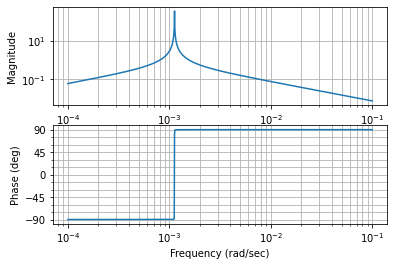

In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = s/(C*s**2+s/R_1+1/L)

ctrl.bode_plot(sys)

### g) Resposta ao Degrau Unitário

In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [C, 1/R_1, 1/L])

plot_unitary_step_response(sys)

### h) Resposta à Rampa Unitária

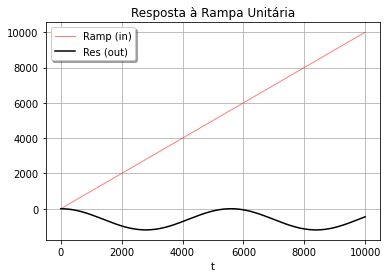

In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [C, 1/R_1, 1/L])

plot_unitary_ramp_response(sys, t_range=10**4)

### i) Resposta à onda quadrada de frequencia pi/8

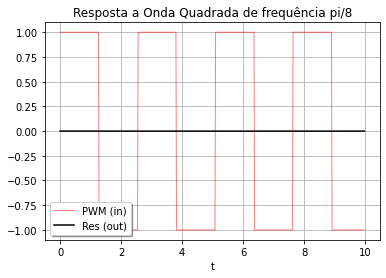

In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [C, 1/R_1, 1/L])

plot_square_wave_response(sys, np.pi/8, 'pi/8')

### j) Resposta aos 1º Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8


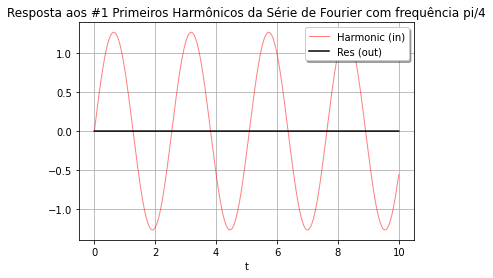

In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [C, 1/R_1, 1/L])

plot_harmonic_response(sys, freq=np.pi/4, harmonic=1, freq_title="pi/4")

### k) Resposta aos 3 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8


In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [C, 1/R_1, 1/L])

plot_harmonic_response(sys, freq=np.pi/4, harmonic=3, freq_title="pi/4")

### l) Resposta aos 5 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8

In [ ]:
R_1 = 47*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [C, 1/R_1, 1/L])

plot_harmonic_response(sys, freq=np.pi/4, harmonic=5, freq_title="pi/4")

### m) Resposta aos 7 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8



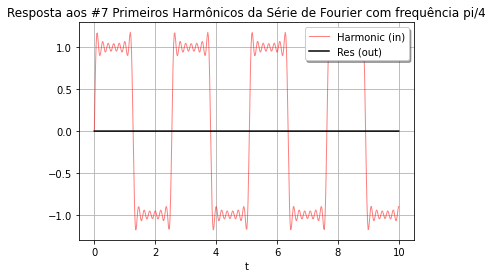

In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [C, 1/R_1, 1/L])

plot_harmonic_response(sys, freq=np.pi/4, harmonic=7, freq_title="pi/4")

## Circuito 6

### e) Diagrama de polos e zeros

In [ ]:
# plot_pz_3_1(0.1)

### f) Diagrama de Bode

(array([1.31944376e-05, 1.35018184e-05, 1.38163470e-05, 1.41381888e-05,
        1.44675129e-05, 1.48044920e-05, 1.51493030e-05, 1.55021268e-05,
        1.58631481e-05, 1.62325561e-05, 1.66105441e-05, 1.69973097e-05,
        1.73930551e-05, 1.77979870e-05, 1.82123165e-05, 1.86362597e-05,
        1.90700374e-05, 1.95138752e-05, 1.99680039e-05, 2.04326594e-05,
        2.09080825e-05, 2.13945197e-05, 2.18922227e-05, 2.24014487e-05,
        2.29224606e-05, 2.34555270e-05, 2.40009221e-05, 2.45589264e-05,
        2.51298262e-05, 2.57139139e-05, 2.63114882e-05, 2.69228543e-05,
        2.75483235e-05, 2.81882139e-05, 2.88428503e-05, 2.95125640e-05,
        3.01976933e-05, 3.08985835e-05, 3.16155869e-05, 3.23490628e-05,
        3.30993781e-05, 3.38669065e-05, 3.46520296e-05, 3.54551362e-05,
        3.62766228e-05, 3.71168933e-05, 3.79763596e-05, 3.88554412e-05,
        3.97545655e-05, 4.06741676e-05, 4.16146907e-05, 4.25765857e-05,
        4.35603117e-05, 4.45663356e-05, 4.55951323e-05, 4.664718

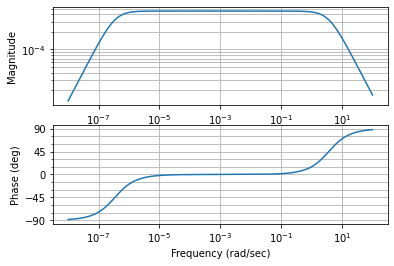

In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = s/(L*s**2+s*R_1+1/C)

ctrl.bode_plot(sys)

### g) Resposta ao Degrau Unitário

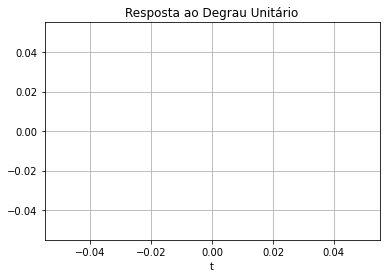

In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [L, R_1, 1/C])

plot_unitary_step_response(sys)

### h) Resposta à Rampa Unitária

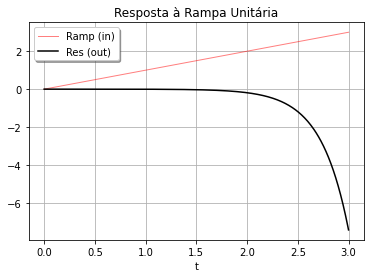

In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [L, R_1, 1/C])

plot_unitary_ramp_response(sys, t_range=3)

### i) Resposta à onda quadrada de frequencia pi/8

In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [L, R_1, 1/C])

plot_square_wave_response(sys, np.pi/8, 'pi/8', t_range=2.6)

### j) Resposta aos 1º Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8


In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [L, R_1, 1/C])

plot_harmonic_response(sys, freq=np.pi/4, harmonic=1, freq_title="pi/4", t_range=2.6)

### k) Resposta aos 3 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8


In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [L, R_1, 1/C])

plot_harmonic_response(sys, freq=np.pi/4, harmonic=3, freq_title="pi/4", t_range=2.6)

### l) Resposta aos 5 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8

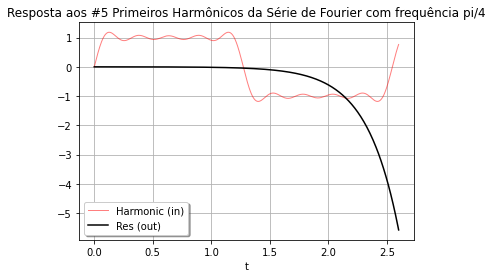

In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [L, R_1, 1/C])

plot_harmonic_response(sys, freq=np.pi/4, harmonic=5, freq_title="pi/4", t_range=2.6)

### m) Resposta aos 7 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/8



In [ ]:
R_1 = 2.2*10**3
C = 220*-6
L = 100*-6
sys = signal.TransferFunction([1, 0], [L, R_1, 1/C])

plot_harmonic_response(sys, freq=np.pi/4, harmonic=7, freq_title="pi/4", t_range=2.6)

# Questão 2)

DRE = 118167558 \
A = 25 \
B = 14 \
C = 8 \
D = 8 

### a) Função de transferência

Utilizando função ss2tf da biblioteca scipy conseguimos encontrar a função de transferência do sistema dado

<img src="https://latex.codecogs.com/gif.latex?H%28s%29%20%3D%20%5Cdfrac%7B8s%20-%2088%7D%7Bs%20-%2025%7D" />


In [ ]:
num, den = signal.ss2tf(25,14,8,8)
sys = signal.TransferFunction(num, den)

### b) Diagrama de Pólos e Zeros da função de transferência
\
Para isso vamos pegar a função que encontramos no passo anterior usando o scipy e vamos reescrever na biblioteca control. Uma vez que essa tem uma função já pronta para gerar o nosso diagrama de polos e zeros, tornando essa etapa mais simples. 

(array([25.]), array([11.]))

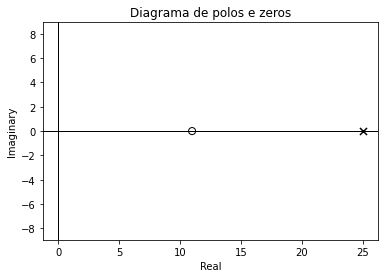

In [ ]:
sys = (8*s - 88)/(s - 25)
ctrl.pzmap(sys, plot=True, title='Diagrama de polos e zeros')

### c) Diagrama de Bode da  função de transferência
\
Para encontrarmos o diarama de bode vamos usar a função bode_plot da biblioteca control


(array([3.5316913 , 3.53185357, 3.53201809, 3.53218488, 3.53235397,
        3.53252541, 3.53269921, 3.53287542, 3.53305407, 3.53323518,
        3.5334188 , 3.53360496, 3.53379368, 3.53398502, 3.534179  ,
        3.53437566, 3.53457504, 3.53477717, 3.53498209, 3.53518984,
        3.53540046, 3.53561398, 3.53583046, 3.53604992, 3.53627241,
        3.53649798, 3.53672665, 3.53695848, 3.5371935 , 3.53743177,
        3.53767332, 3.53791821, 3.53816647, 3.53841815, 3.5386733 ,
        3.53893196, 3.53919419, 3.53946004, 3.53972954, 3.54000276,
        3.54027973, 3.54056053, 3.54084518, 3.54113376, 3.5414263 ,
        3.54172287, 3.54202352, 3.54232831, 3.54263729, 3.54295051,
        3.54326804, 3.54358994, 3.54391626, 3.54424706, 3.54458241,
        3.54492236, 3.54526698, 3.54561634, 3.54597048, 3.54632949,
        3.54669343, 3.54706235, 3.54743634, 3.54781545, 3.54819977,
        3.54858935, 3.54898426, 3.54938459, 3.54979041, 3.55020178,
        3.55061878, 3.55104149, 3.55146998, 3.55

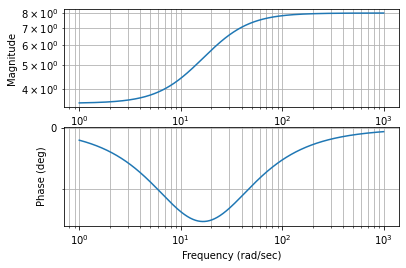

In [ ]:
sys = (8*s - 88)/(s - 25)
ctrl.bode_plot(sys)

### f) Resposta ao Degrau Unitário

In [ ]:
sys = signal.TransferFunction([8, -88], [1, -25])
plot_unitary_step_response(sys)

### g) Resposta à Rampa Unitária

In [ ]:
sys = signal.TransferFunction([8, -88], [1, -25])
plot_unitary_ramp_response(sys=sys, t_range=1)

## h) Resposta à Onda Quadrada de frequência pi/4

In [ ]:
sys = signal.TransferFunction([8, -88], [1, -25])
plot_square_wave_response(sys=sys, freq=np.pi/4, t_freq="pi/4", t_range=0.1)

## i) Resposta ao 1º Harmônico da Série de Fourier de uma Onda quadrada de frequência pi/2

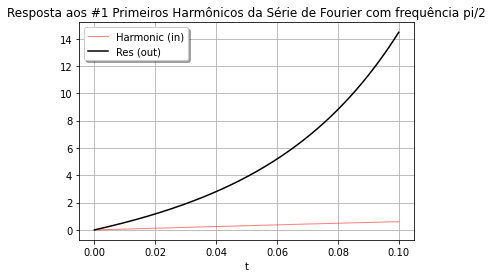

In [ ]:
sys = signal.TransferFunction([8, -88], [1, -25])
plot_harmonic_response(sys=sys, freq=np.pi/2, harmonic=1, freq_title="pi/2", t_range=0.1)

## j) Resposta aos 3 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/2

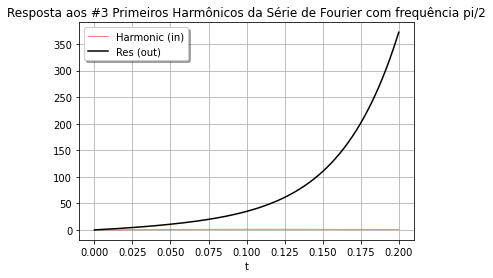

In [ ]:
sys = signal.TransferFunction([8, -88], [1, -25])
plot_harmonic_response(sys=sys, freq=np.pi/2, harmonic=3, freq_title="pi/2", t_range=0.2)

## k) Resposta aos 5 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/2

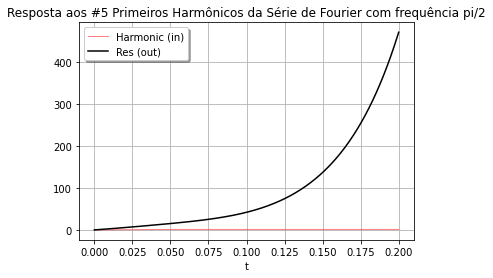

In [ ]:
sys = signal.TransferFunction([8, -88], [1, -25])
plot_harmonic_response(sys=sys, freq=np.pi/2, harmonic=5, freq_title="pi/2", t_range=0.2)

## l) Resposta aos 7 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/2

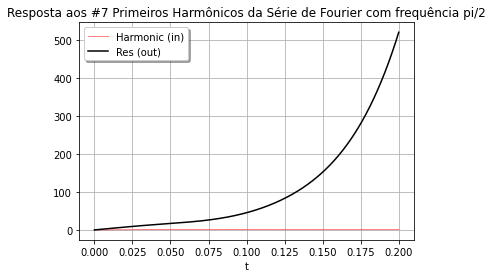

In [ ]:
sys = signal.TransferFunction([8, -88], [1, -25])
plot_harmonic_response(sys=sys, freq=np.pi/2, harmonic=7, freq_title="pi/2", t_range=0.2)

# Questão 3)

## 3.1


### b) Diagrama de polos e zeros

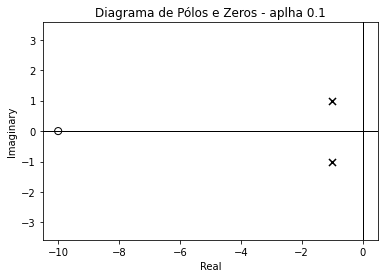

In [ ]:
plot_pz_3_1(0.1)

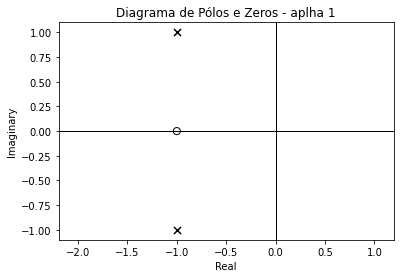

In [ ]:
plot_pz_3_1(1)

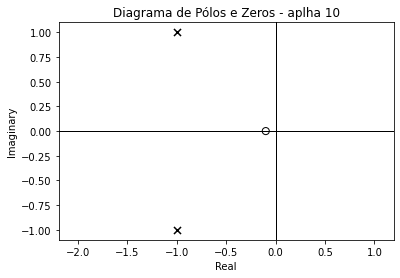

In [ ]:
plot_pz_3_1(10)

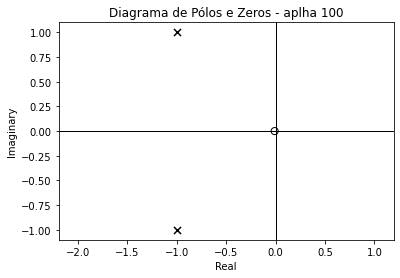

In [ ]:
plot_pz_3_1(100)

### c) Diagrama de Bode

Diagrama de Bode - alpha 0.1


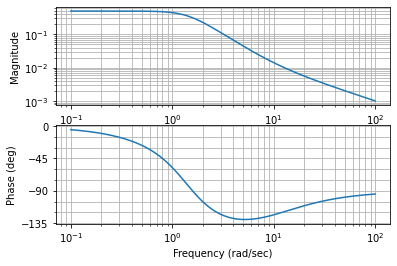

In [ ]:
plot_bode_3_1(0.1)

Diagrama de Bode - alpha 1


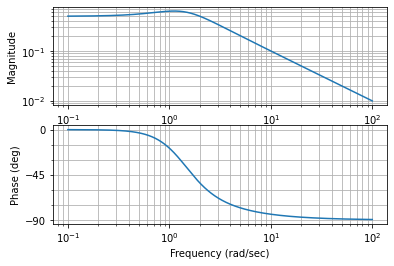

In [ ]:
plot_bode_3_1(1)

Diagrama de Bode - alpha 10


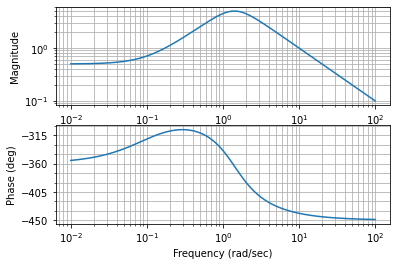

In [ ]:
plot_bode_3_1(10)

Diagrama de Bode - alpha 100


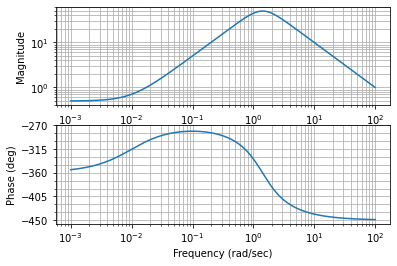

In [ ]:
plot_bode_3_1(100)

### d) Resposta ao Degrau Unitário

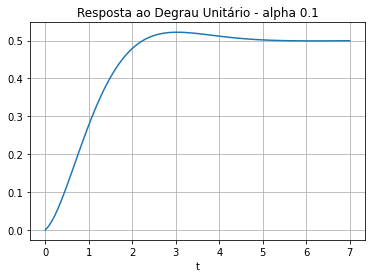

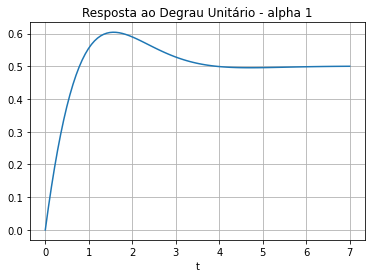

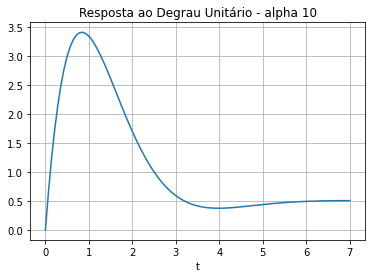

In [ ]:
for alpha in alphas:
  sys = signal.TransferFunction([alpha, 1],[1, 2, 2])
  plot_unitary_step_response(sys=sys, alpha=alpha)

### e) Resposta à Rampa Unitária

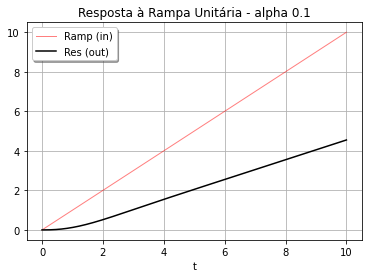

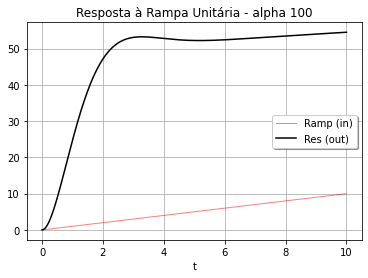

In [ ]:
for alpha in alphas:
  sys = signal.TransferFunction([alpha, 1],[1, 2, 2])
  plot_unitary_ramp_response(sys=sys, alpha=alpha)

### f) Resposta à onda quadrada de frequencia pi/8

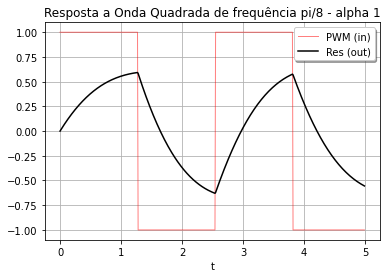

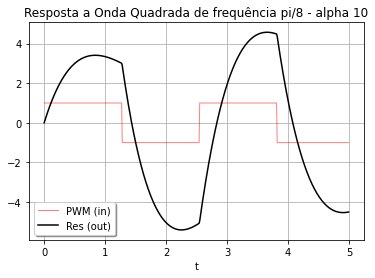

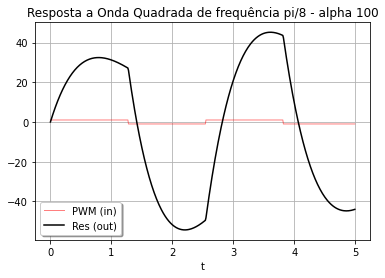

In [ ]:
for alpha in alphas:
  sys = signal.TransferFunction([alpha, 1],[1, 2, 2])
  plot_square_wave_response(sys=sys, freq=np.pi/8, t_freq='pi/8', alpha=alpha, t_range=5)

### g) Resposta ao 1º Harmônico da Série de Fourier de uma Onda quadrada de frequência pi/4


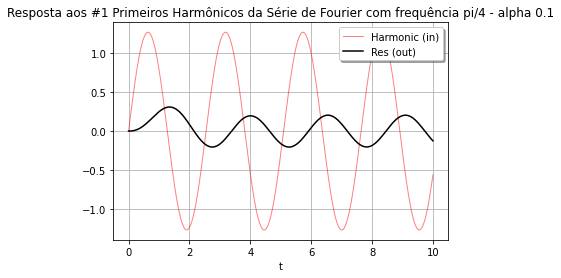

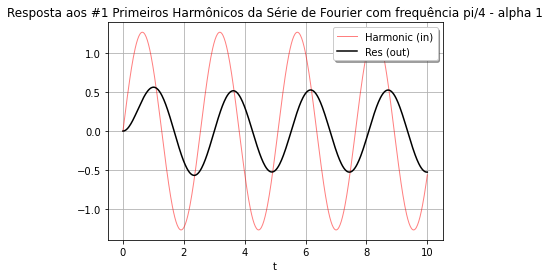

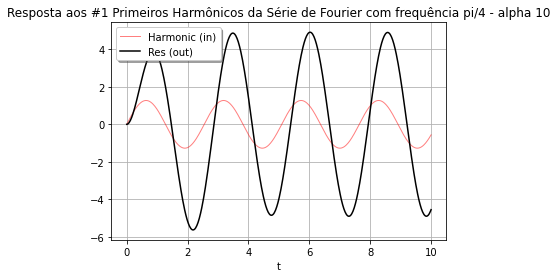

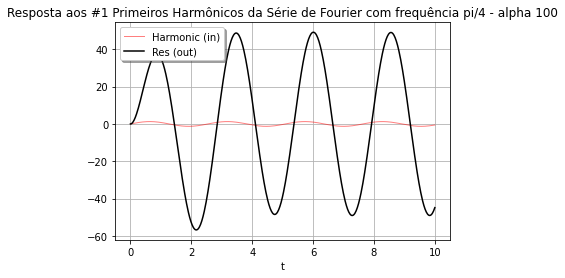

In [ ]:
for alpha in alphas:
  sys = signal.TransferFunction([alpha, 1],[1, 2, 2])
  plot_harmonic_response(sys=sys, freq=np.pi/4, harmonic=1, alpha=alpha, freq_title="pi/4")

### h) Resposta aos 3 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/4


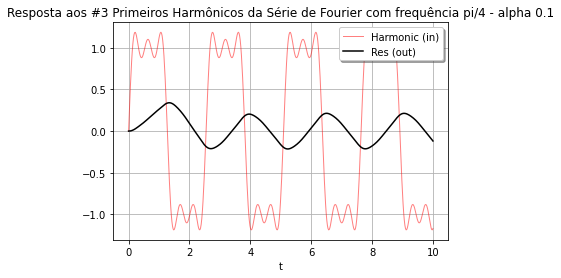

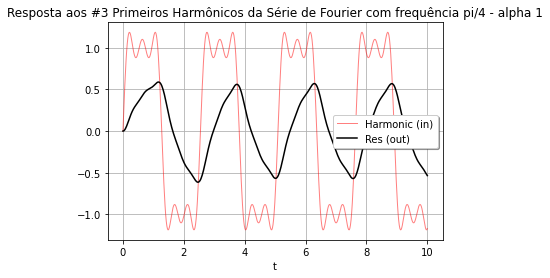

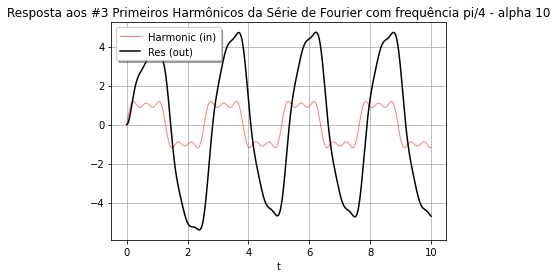

In [ ]:
for alpha in alphas:
  sys = signal.TransferFunction([alpha, 1],[1, 2, 2])
  plot_harmonic_response(sys=sys, freq=np.pi/4, harmonic=3, alpha=alpha, freq_title="pi/4")

### i) Resposta aos 5 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/4

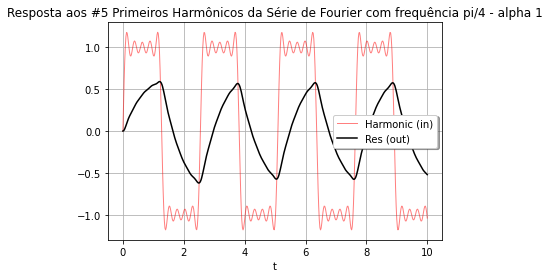

In [ ]:
for alpha in alphas:
  sys = signal.TransferFunction([alpha, 1],[1, 2, 2])
  plot_harmonic_response(sys=sys, freq=np.pi/4, harmonic=5, alpha=alpha, freq_title="pi/4")

### j) Resposta aos 7 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/4



In [ ]:
for alpha in alphas:
  sys = signal.TransferFunction([alpha, 1],[1, 2, 2])
  plot_harmonic_response(sys=sys, freq=np.pi/4, harmonic=7, alpha=alpha, freq_title="pi/4")

### k)  Resposta a cossenóides de frequências 0,1 Hz, 1 Hz, 10 Hz, 100 Hz, 1000 Hz.


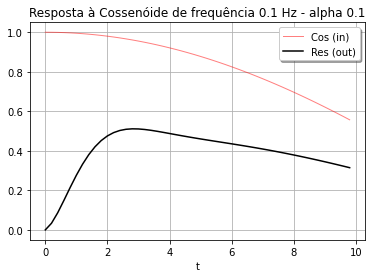

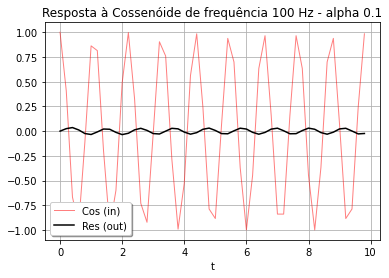

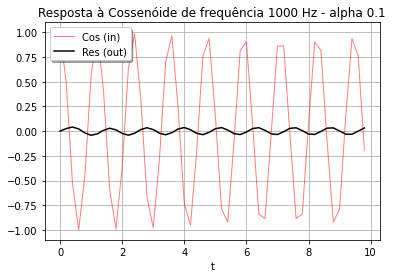

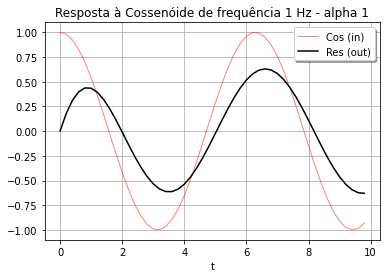

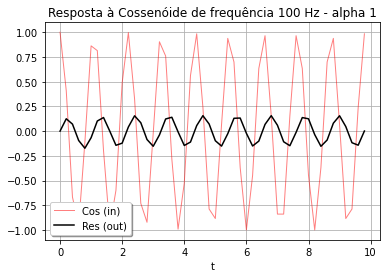

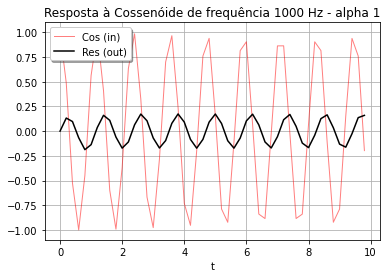

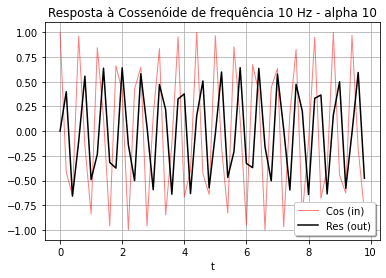

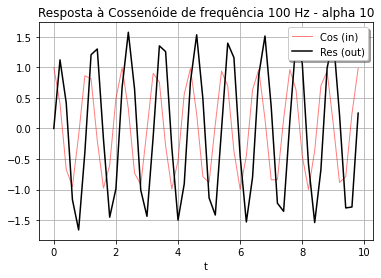

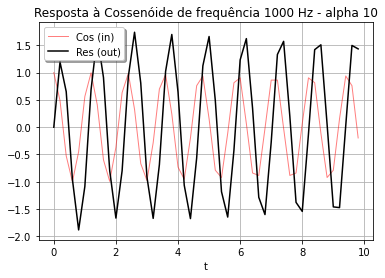

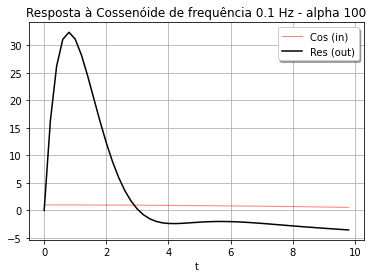

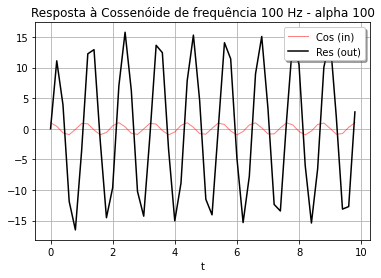

In [ ]:
cos_frequencies = [0.1, 1, 10, 100, 1000]

for alpha in alphas:
  sys = signal.TransferFunction([alpha, 1],[1, 2, 2])
  for freq in cos_frequencies:
    plot_cosine_response(sys=sys, freq=freq, alpha=alpha, t_range=10, ratio=50)

## 3.2

### b) Diagrama de polos e zeros

In [ ]:
plot_pz_3_2(0.1)

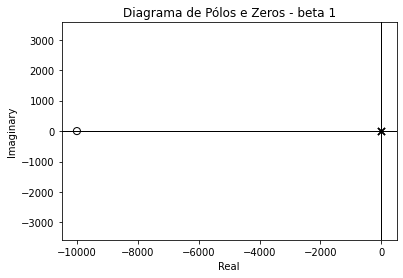

In [ ]:
plot_pz_3_2(1)

In [ ]:
plot_pz_3_2(10)

In [ ]:
plot_pz_3_2(100)

### c) Diagrama de Bode

Diagrama de Bode - beta 0.1


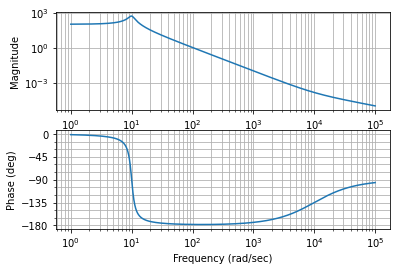

In [ ]:
plot_bode_3_2(0.1)

Diagrama de Bode - beta 1


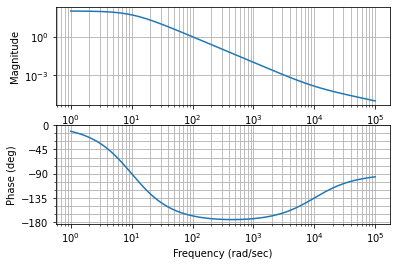

In [ ]:
plot_bode_3_2(1)

Diagrama de Bode - beta 10


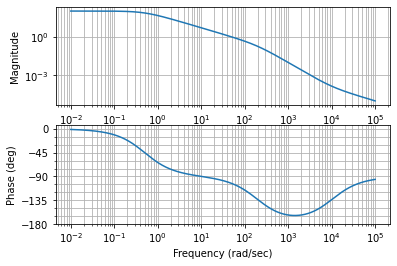

In [ ]:
plot_bode_3_2(10)

Diagrama de Bode - beta 100


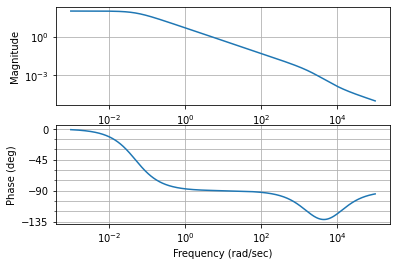

In [ ]:
plot_bode_3_2(100)

### d) Resposta ao Degrau Unitário

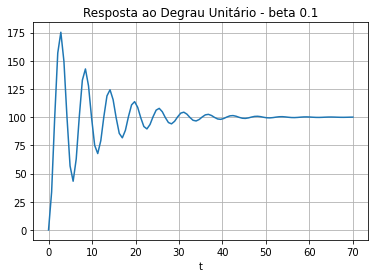

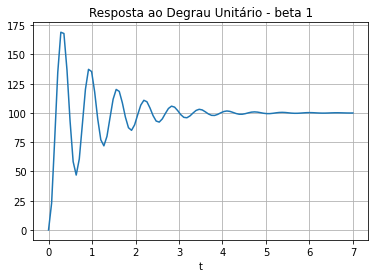

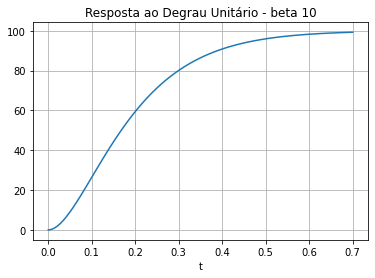

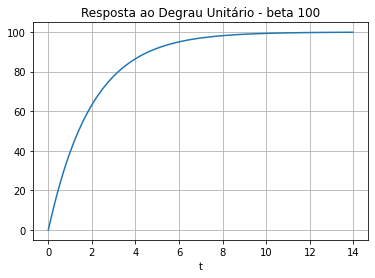

In [ ]:
for beta in betas:
  sys = signal.TransferFunction([1, 10**4],[1, 2*beta, 100])
  plot_unitary_step_response(sys, beta=beta)

### e) Resposta à Rampa Unitária

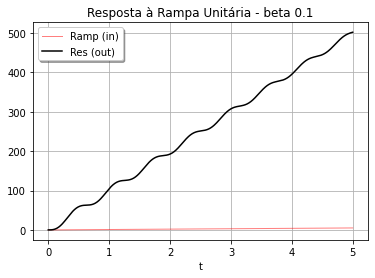

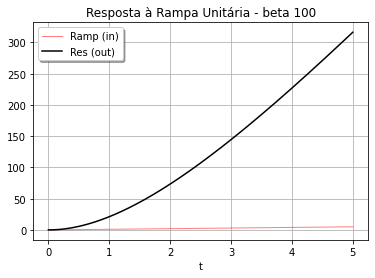

In [ ]:
for beta in betas:
  sys = signal.TransferFunction([1, 10**4],[1, 2*beta, 100])
  plot_unitary_ramp_response(sys=sys, beta=beta, t_range=5)

### f) Resposta à onda quadrada de frequencia pi/8

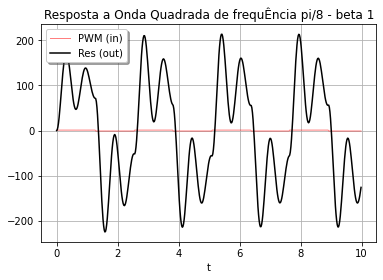

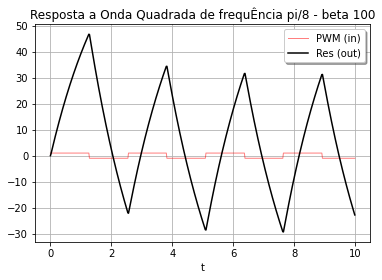

In [ ]:
for beta in betas:
  sys = signal.TransferFunction([1, 10**4],[1, 2*beta, 100])
  plot_square_wave_response(sys=sys, freq=np.pi/8, t_freq='pi/8', beta=beta)

### g) Resposta ao 1º Harmônico da Série de Fourier de uma Onda quadrada de frequência pi/4

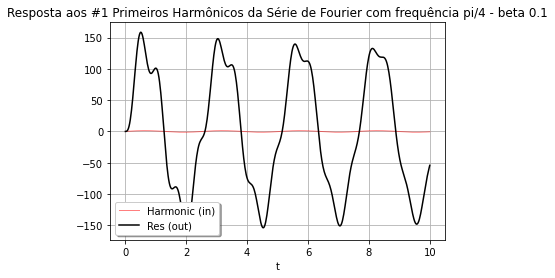

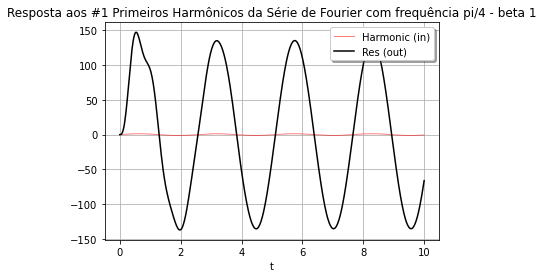

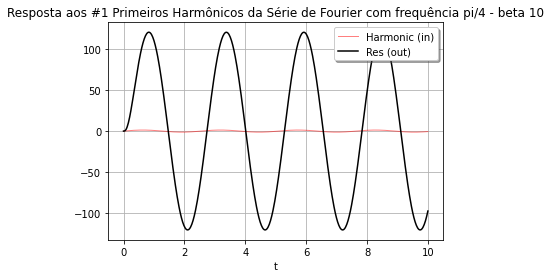

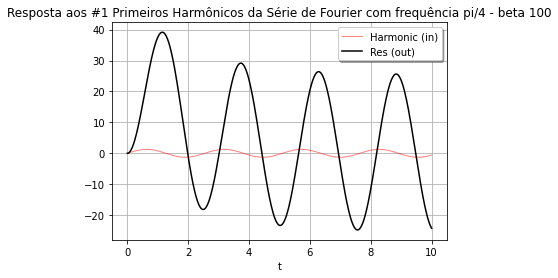

In [ ]:
for beta in betas:
  sys = signal.TransferFunction([1, 10**4],[1, 2*beta, 100])
  plot_harmonic_response(sys=sys, freq=np.pi/4, harmonic=1, beta=beta, freq_title="pi/4")

### h) Resposta aos 3 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/4


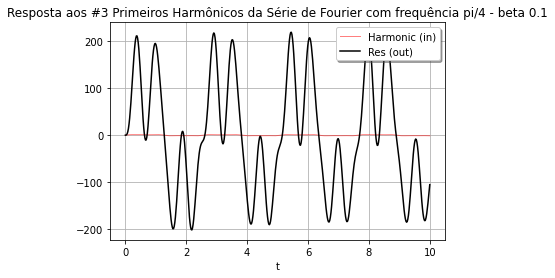

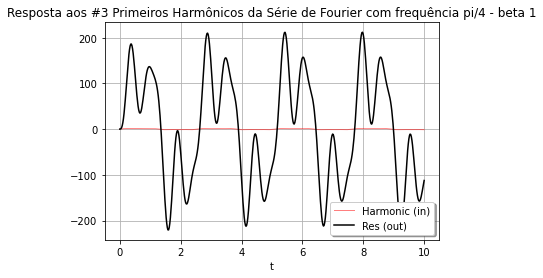

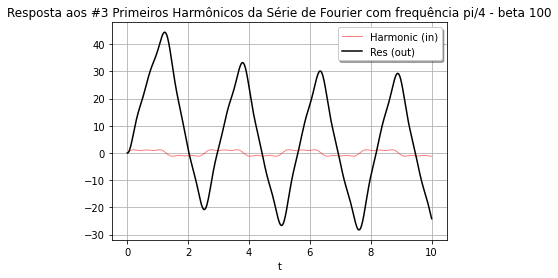

In [ ]:
for beta in betas:
  sys = signal.TransferFunction([1, 10**4],[1, 2*beta, 100])
  plot_harmonic_response(sys=sys, freq=np.pi/4, harmonic=3, beta=beta, freq_title="pi/4")

### i) Resposta aos 5 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/4

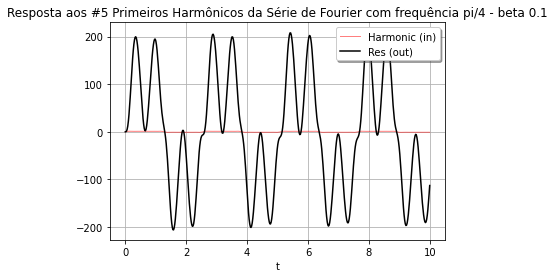

In [ ]:
for beta in betas:
  sys = signal.TransferFunction([1, 10**4],[1, 2*beta, 100])
  plot_harmonic_response(sys=sys, freq=np.pi/4, harmonic=5, beta=beta, freq_title="pi/4")

### j) Resposta aos 7 Primeiros Harmônicos da Série de Fourier de uma Onda quadrada de frequência pi/4



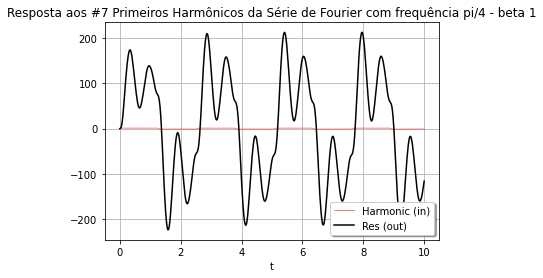

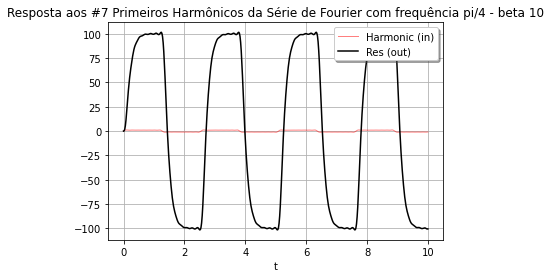

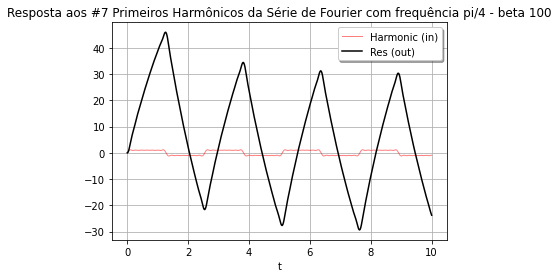

In [ ]:
for beta in betas:
  sys = signal.TransferFunction([1, 10**4],[1, 2*beta, 100])
  plot_harmonic_response(sys=sys, freq=np.pi/4, harmonic=7, beta=beta, freq_title="pi/4")

### k)  Resposta a cossenóides de frequências 0,1 Hz, 1 Hz, 10 Hz, 100 Hz, 1000 Hz.


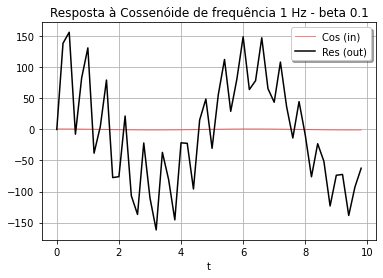

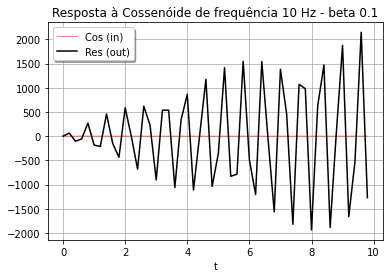

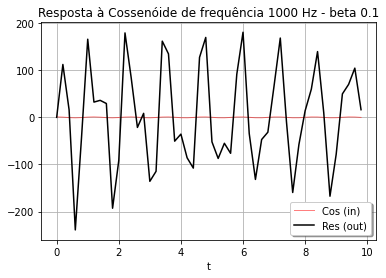

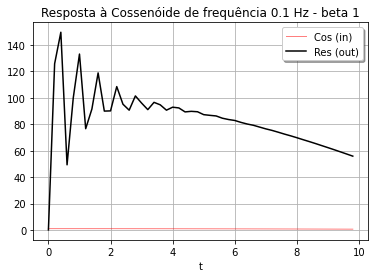

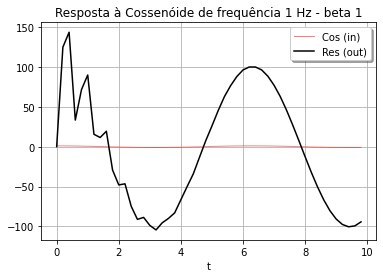

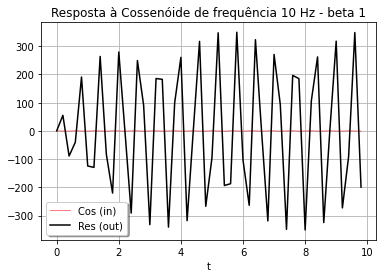

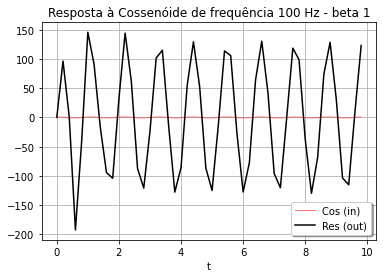

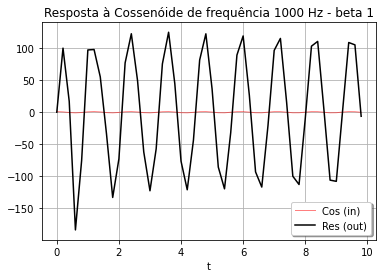

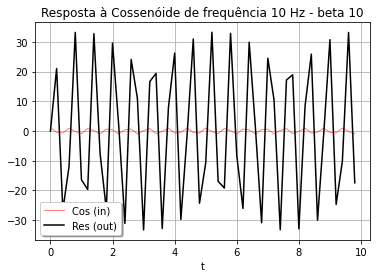

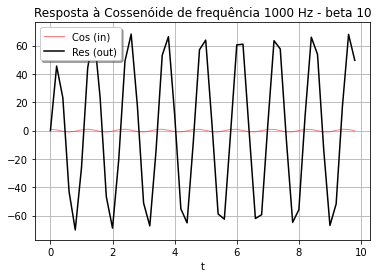

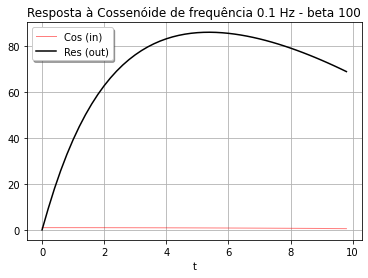

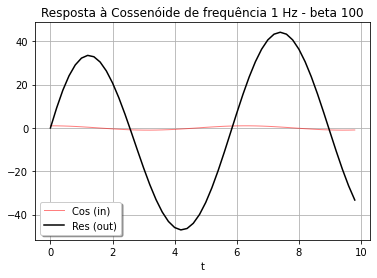

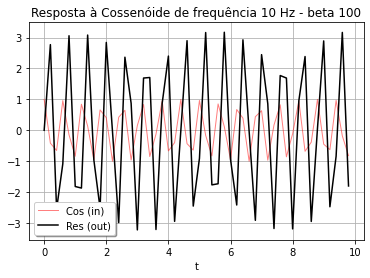

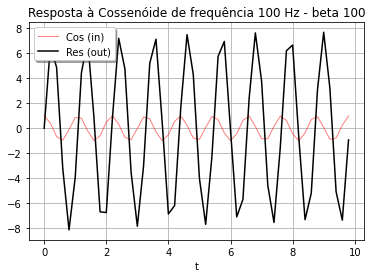

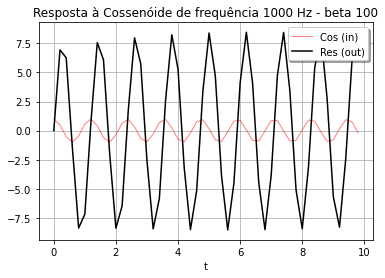

In [ ]:
cos_frequencies = [0.1, 1, 10, 100, 1000]

for beta in betas:
  sys = signal.TransferFunction([1, 10**4],[1, 2*beta, 100])
  for freq in cos_frequencies:
    plot_cosine_response(sys=sys, freq=freq, beta=beta, t_range=10, ratio=50)

Diagrama de Bode


(array([0.99994403, 0.99994325, 0.99994246, 0.99994166, 0.99994085,
        0.99994002, 0.99993919, 0.99993834, 0.99993748, 0.99993661,
        0.99993573, 0.99993483, 0.99993393, 0.99993301, 0.99993207,
        0.99993113, 0.99993017, 0.9999292 , 0.99992821, 0.99992721,
        0.9999262 , 0.99992517, 0.99992413, 0.99992307, 0.999922  ,
        0.99992092, 0.99991981, 0.9999187 , 0.99991757, 0.99991642,
        0.99991525, 0.99991407, 0.99991288, 0.99991166, 0.99991043,
        0.99990919, 0.99990792, 0.99990664, 0.99990534, 0.99990402,
        0.99990269, 0.99990133, 0.99989996, 0.99989857, 0.99989715,
        0.99989572, 0.99989427, 0.9998928 , 0.9998913 , 0.99988979,
        0.99988826, 0.9998867 , 0.99988512, 0.99988352, 0.9998819 ,
        0.99988026, 0.99987859, 0.9998769 , 0.99987519, 0.99987345,
        0.99987169, 0.9998699 , 0.99986809, 0.99986625, 0.99986439,
        0.9998625 , 0.99986059, 0.99985865, 0.99985668, 0.99985468,
        0.99985266, 0.99985061, 0.99984853, 0.99

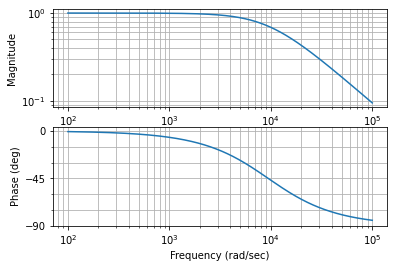

In [ ]:
  sys = (1)/((987*107.2e-9)*s + 1)
  print(f'Diagrama de Bode')
  ctrl.bode_plot(sys, plot=True)

(array([0.99994807, 0.99994734, 0.99994661, 0.99994586, 0.99994511,
        0.99994434, 0.99994356, 0.99994277, 0.99994198, 0.99994117,
        0.99994035, 0.99993951, 0.99993867, 0.99993781, 0.99993694,
        0.99993606, 0.99993517, 0.99993427, 0.99993335, 0.99993242,
        0.99993148, 0.99993052, 0.99992955, 0.99992856, 0.99992757,
        0.99992656, 0.99992553, 0.99992449, 0.99992344, 0.99992237,
        0.99992128, 0.99992018, 0.99991907, 0.99991794, 0.99991679,
        0.99991563, 0.99991445, 0.99991326, 0.99991204, 0.99991081,
        0.99990957, 0.99990831, 0.99990702, 0.99990572, 0.99990441,
        0.99990307, 0.99990172, 0.99990034, 0.99989895, 0.99989754,
        0.9998961 , 0.99989465, 0.99989318, 0.99989169, 0.99989017,
        0.99988864, 0.99988708, 0.9998855 , 0.9998839 , 0.99988227,
        0.99988063, 0.99987896, 0.99987726, 0.99987555, 0.99987381,
        0.99987204, 0.99987025, 0.99986843, 0.99986659, 0.99986473,
        0.99986283, 0.99986091, 0.99985897, 0.99

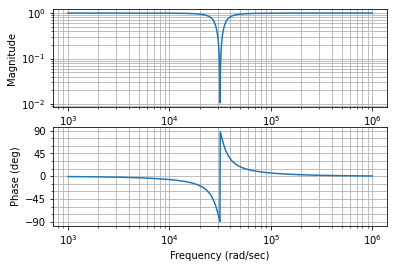

In [ ]:
R = 2.2e3
L = 22.4e-3
C = 44.8e-9

sys = (s**2 + 1/(C*L))/(s**2 + s/(R*C) + 1/(C*L))

ctrl.bode_plot(sys)